# Purpose
The purpose of this notebook is to clean the `kaggle_uncleaned.parquet` file, save it and generate an automated exploratory analysis report.

In [1]:
# Import modules
import pandas as pd
from utils.helper_v2 import ImmoHelper
import sweetviz as sv
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
helper = ImmoHelper(url='https://github.com/Immobilienrechner-Challenge/data/blob/main/kaggle_uncleaned.parquet?raw=true')
df = helper.process_data(return_gde=False, kaggle=True)

In [3]:
df.shape

(24556, 15)

In [4]:
def clean_rows(df_rows):
    # remove french entry
    df_rows = df_rows[df_rows['zip_code'] != 4160]
    # remove outliers
    df_rows = df_rows[df_rows['plot_area'].fillna(0) < 247330]
    df_rows = df_rows[df_rows['living_space'].fillna(0) < 1450]
    df_rows = df_rows[df_rows['floor'].fillna(0) <= 100]
    
    # drop where zip_code is na
    df_rows.dropna(subset=['zip_code'], inplace=True)

    return df_rows

In [5]:
df = clean_rows(df)
df.shape

(24551, 15)

                                             |          | [  0%]   00:00 -> (? left)


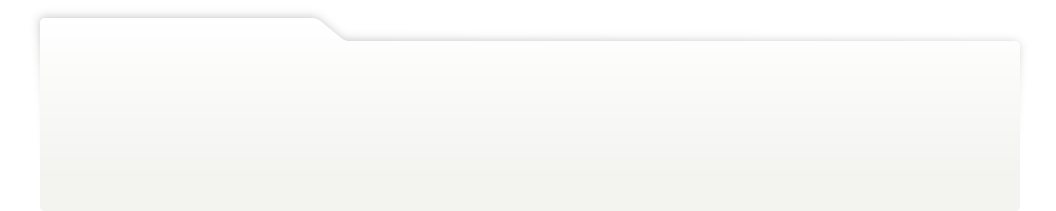
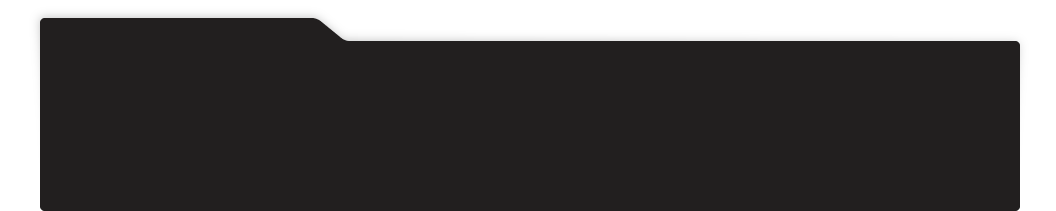
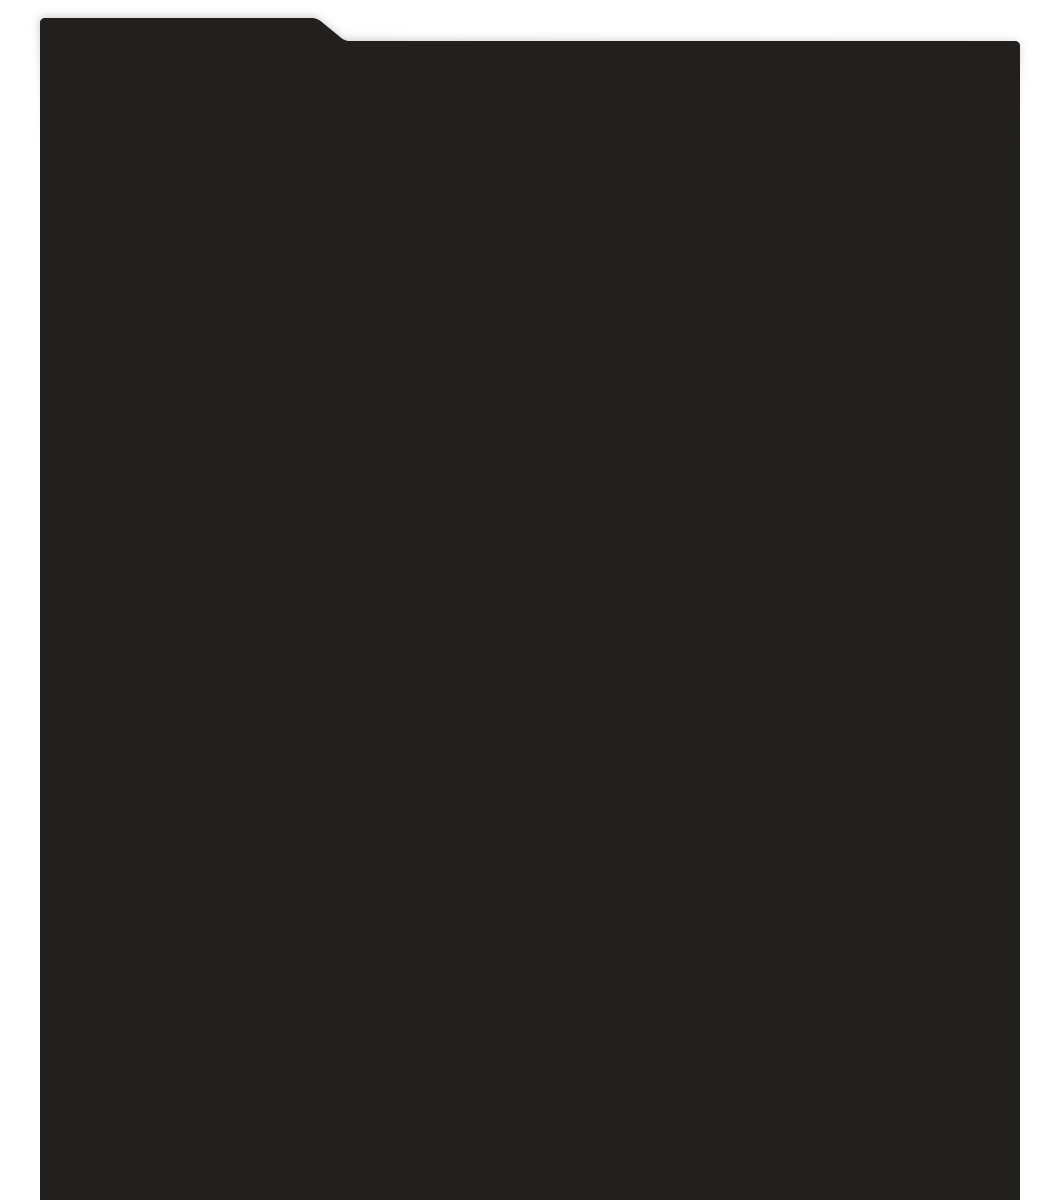
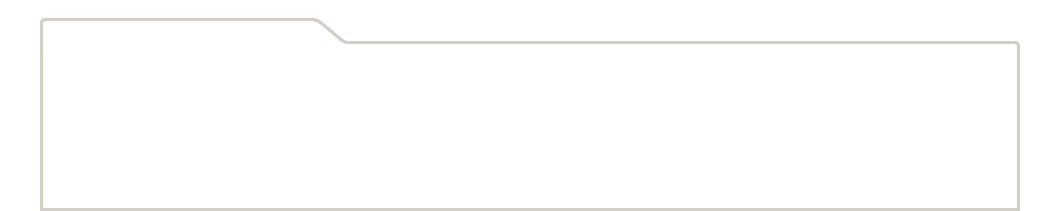
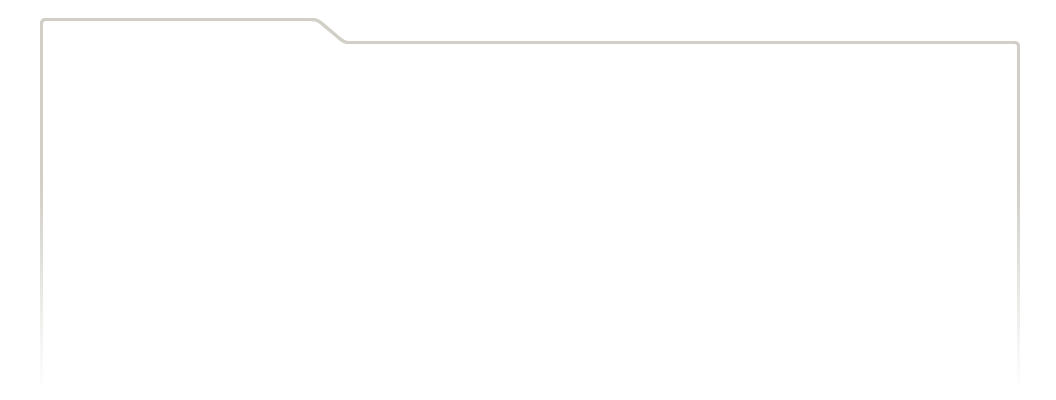
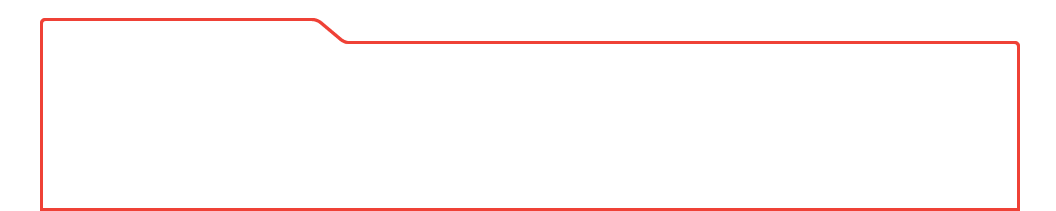
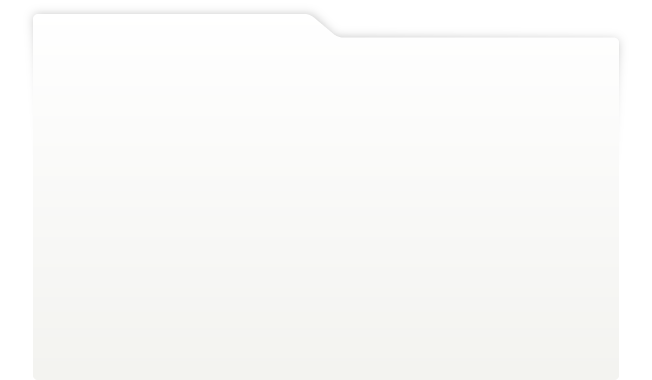
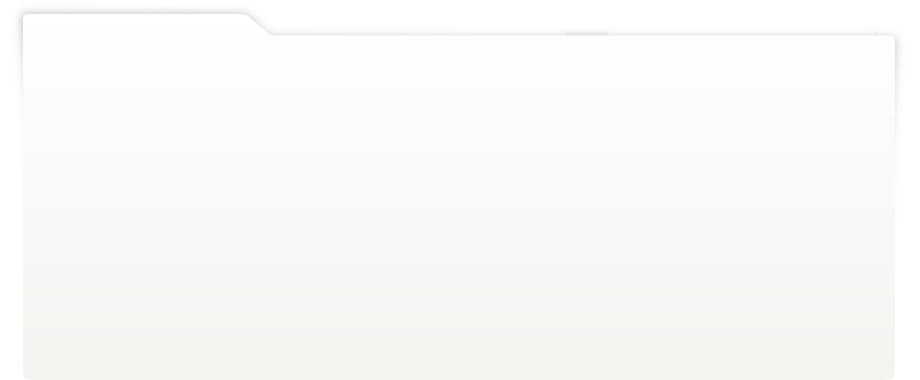
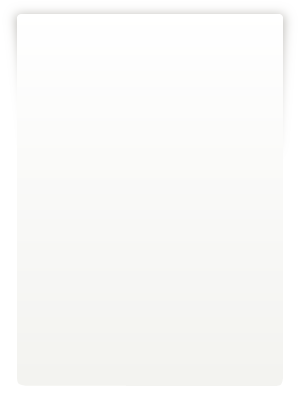
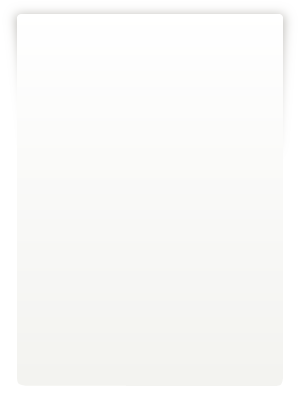
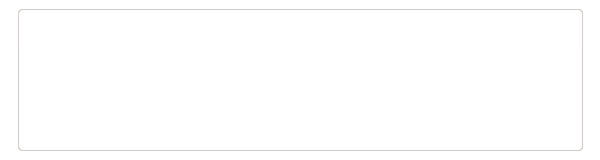
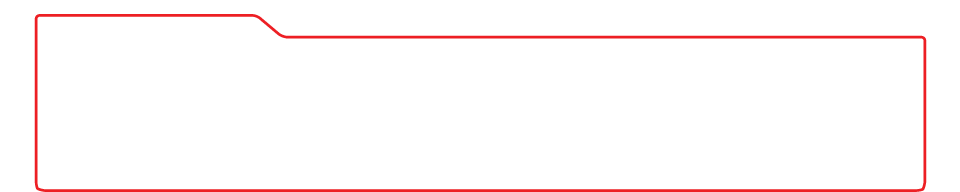
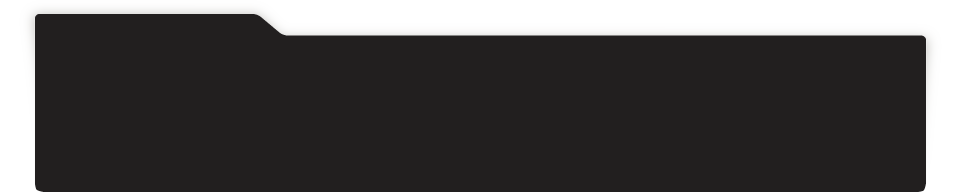
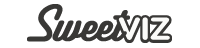
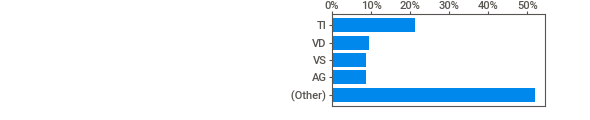
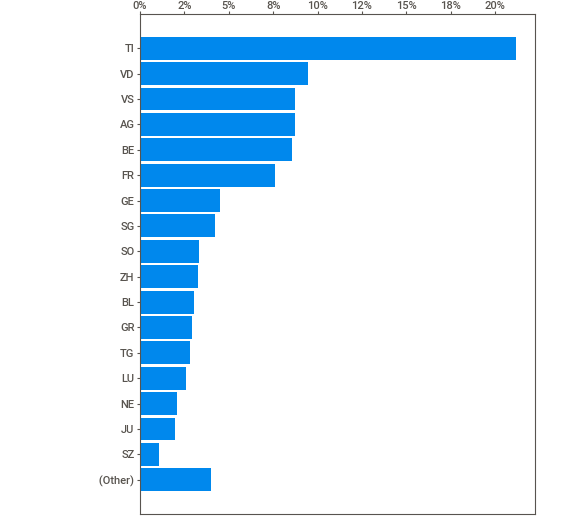
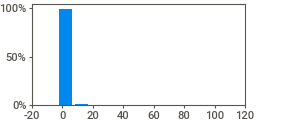
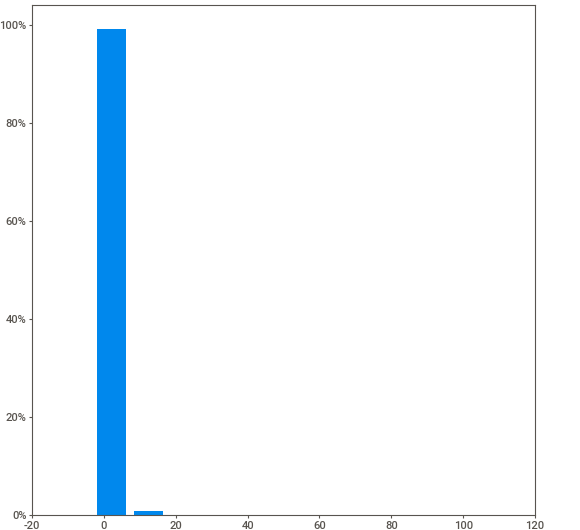
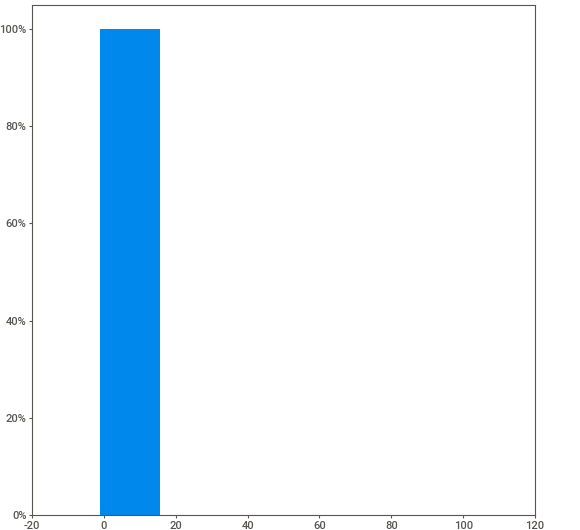
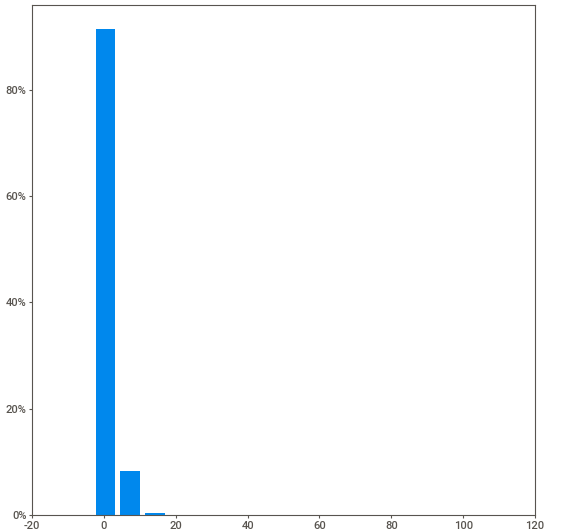
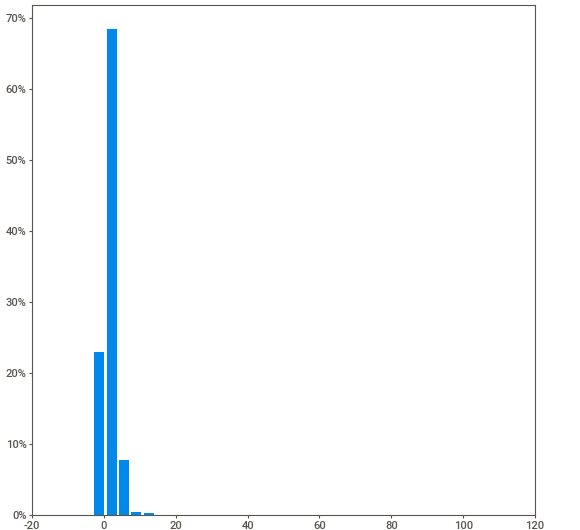
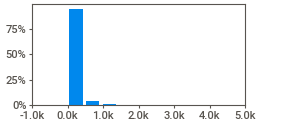
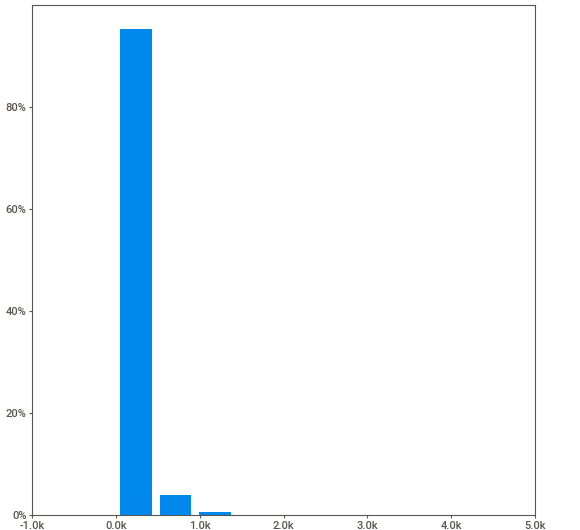
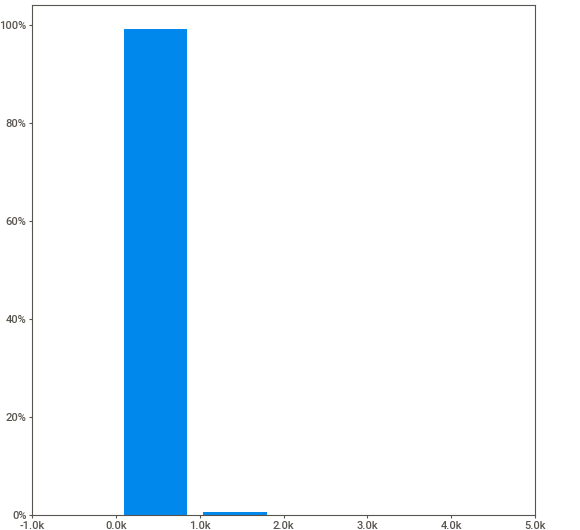
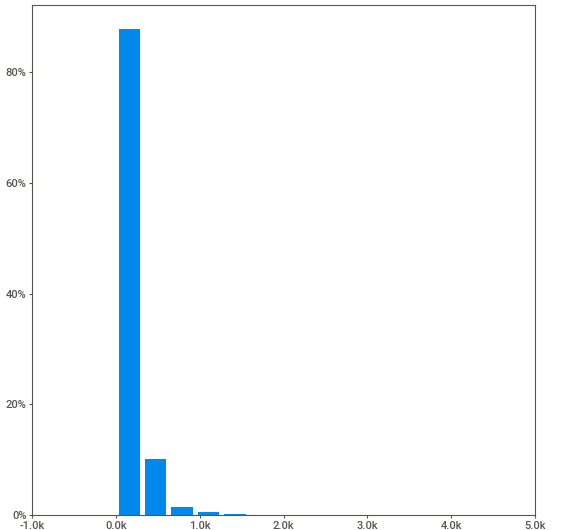
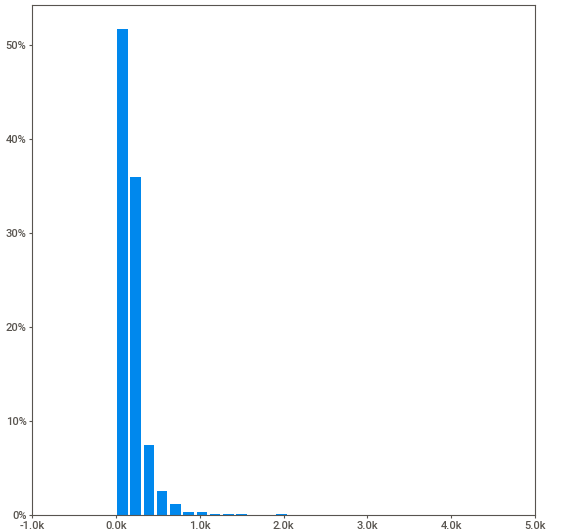
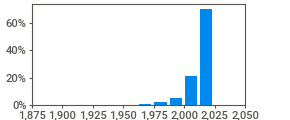
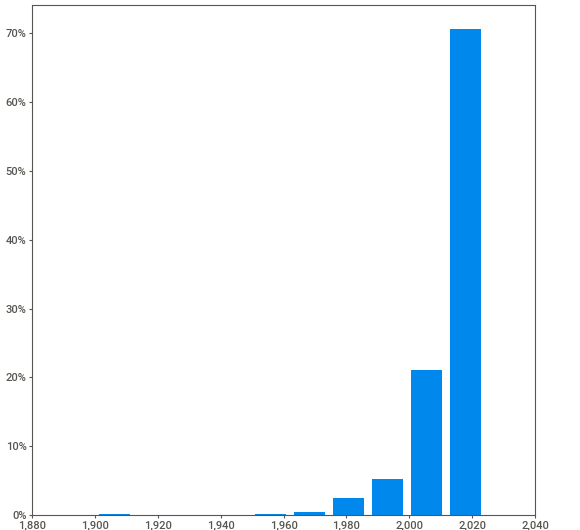
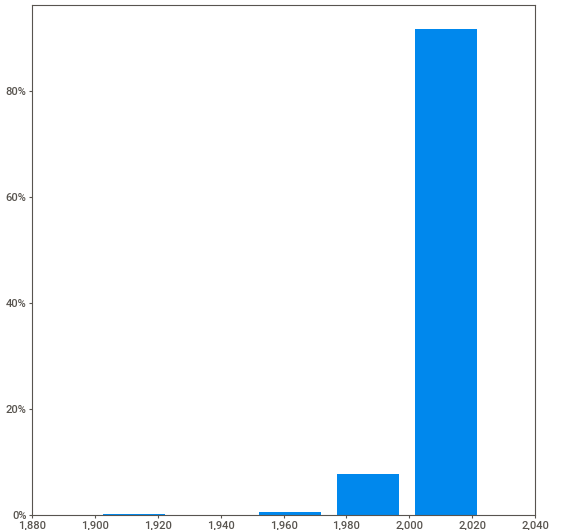
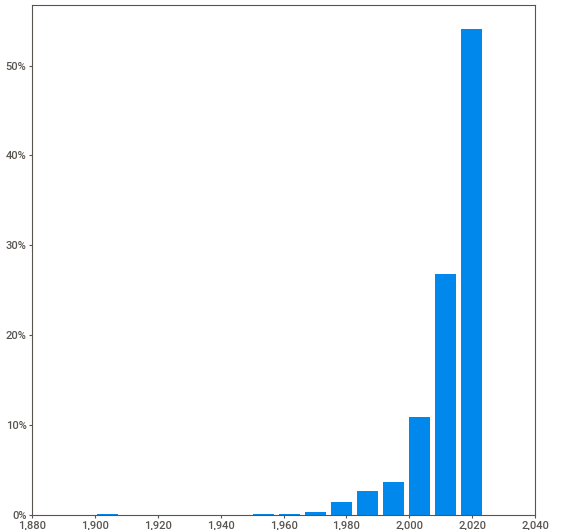
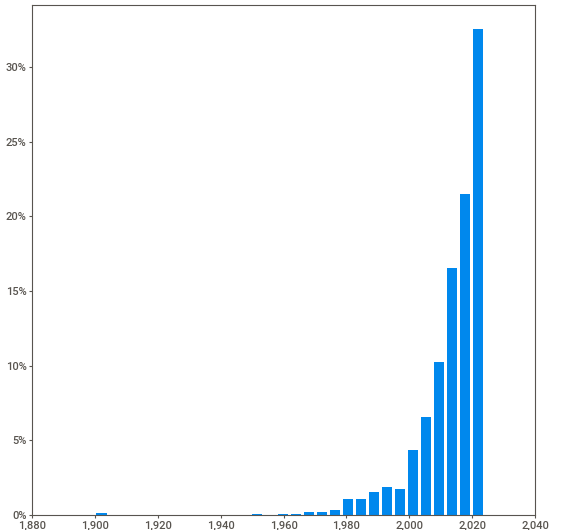
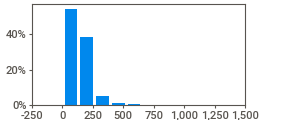
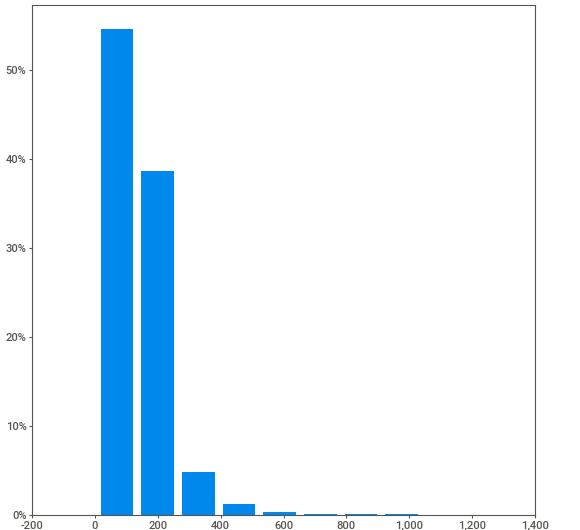
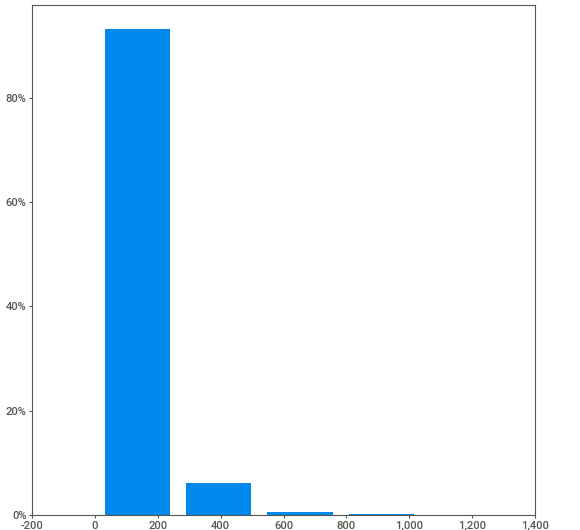
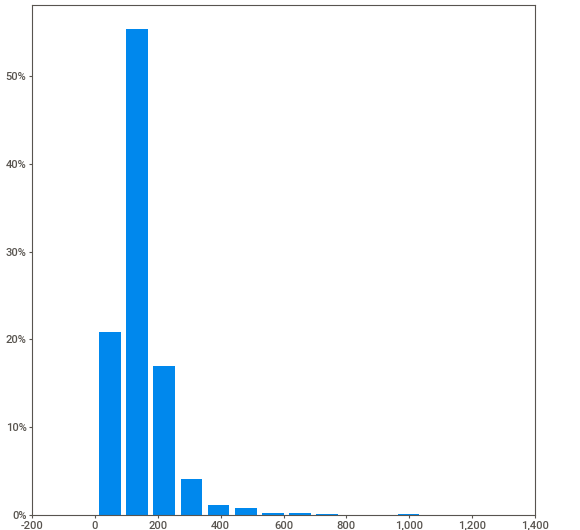
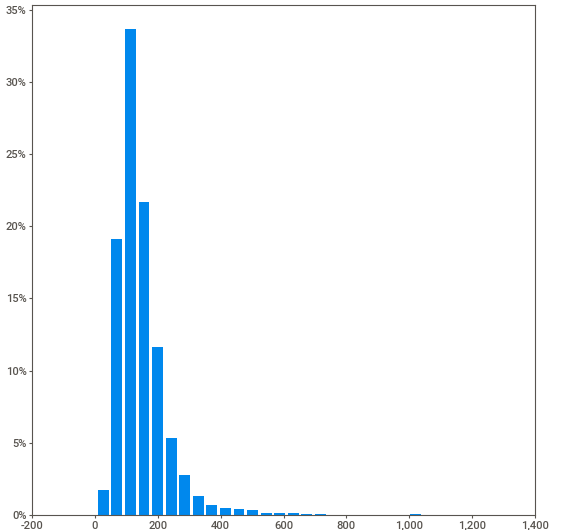
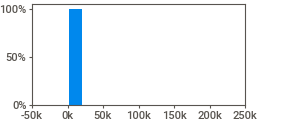
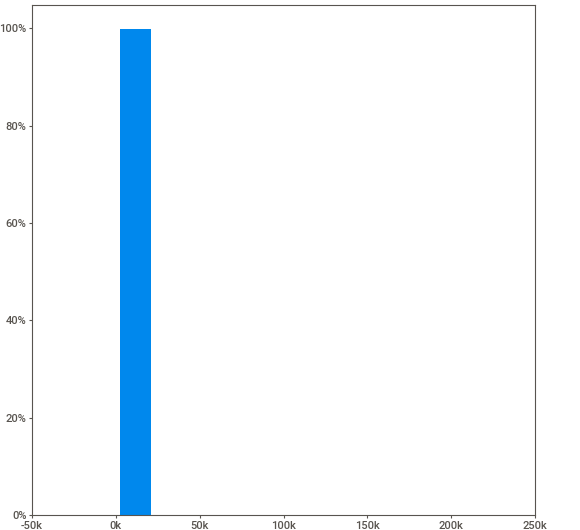
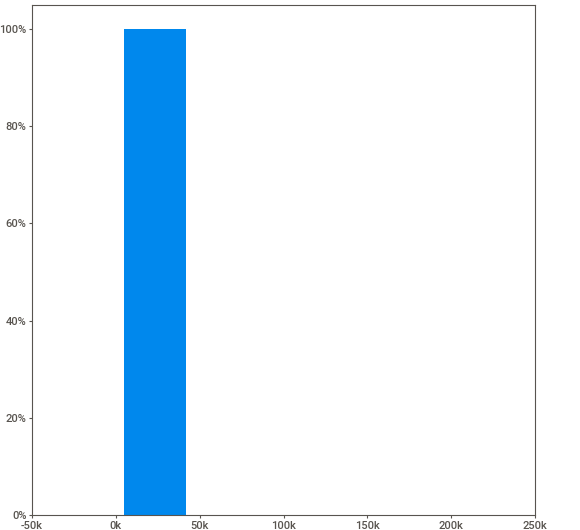
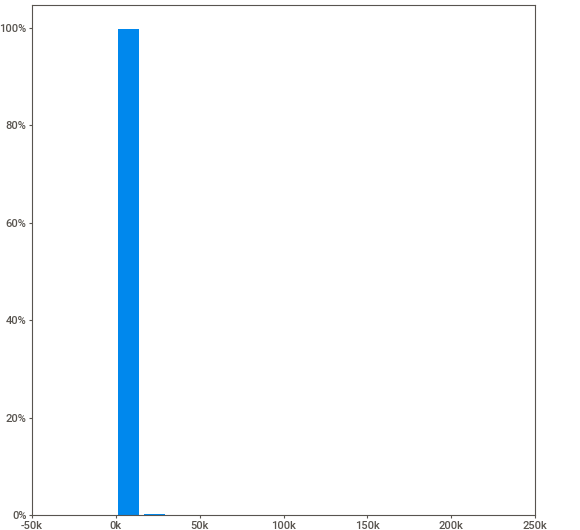
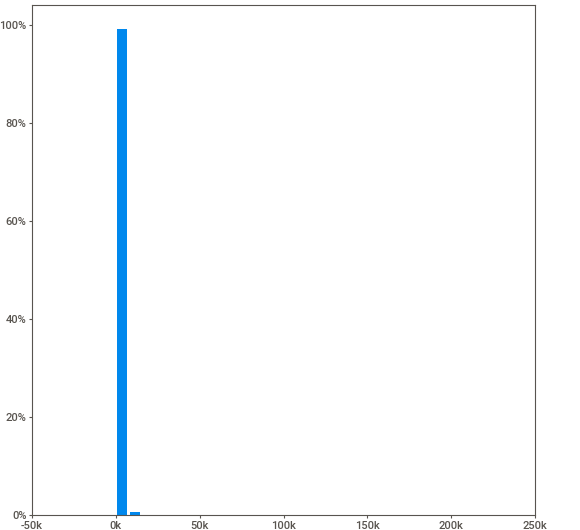
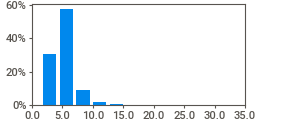
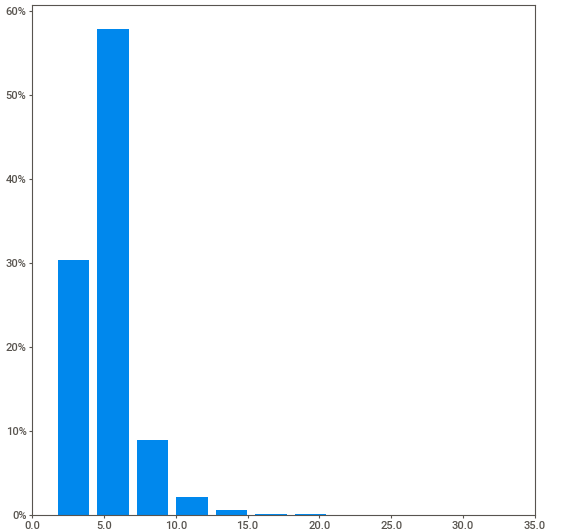
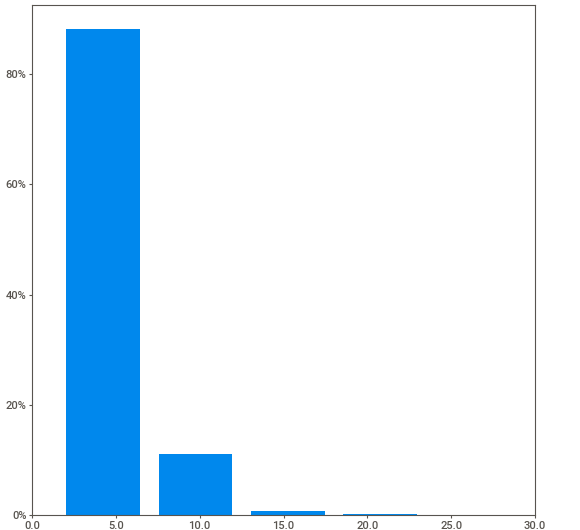
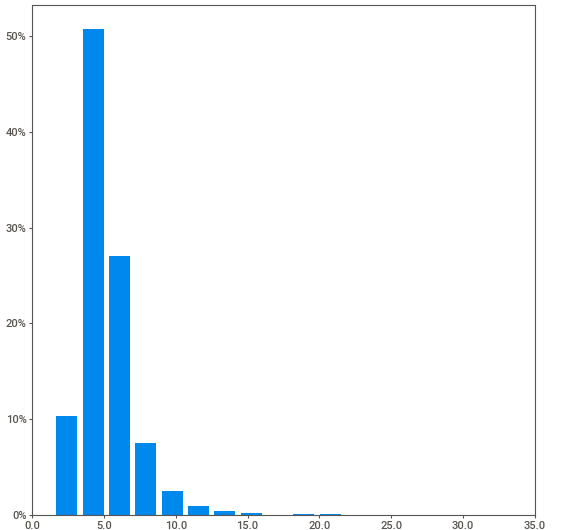
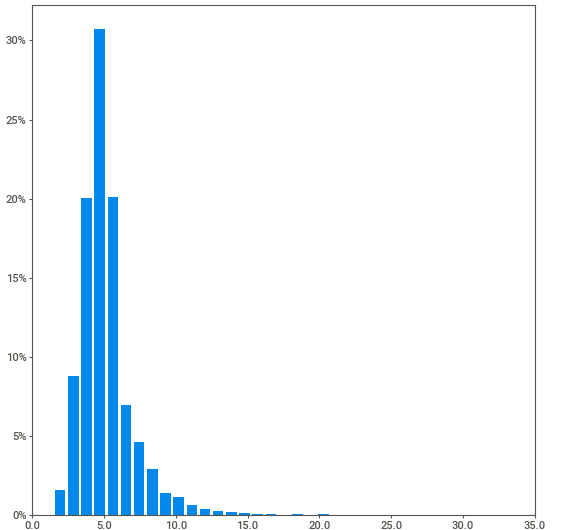
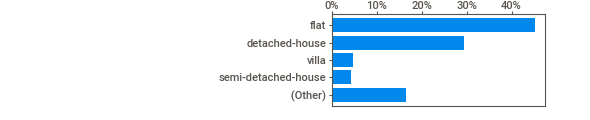
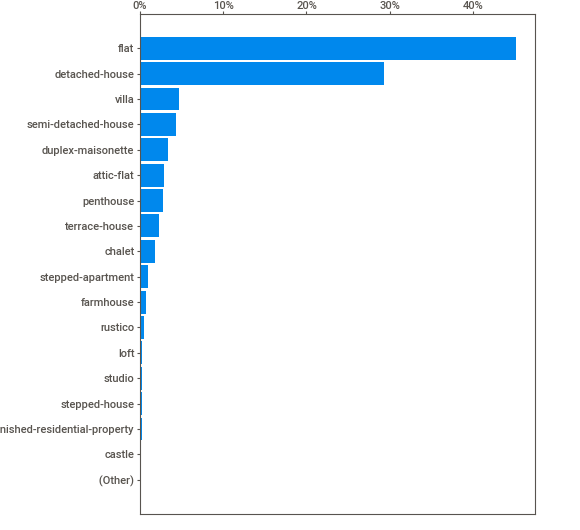
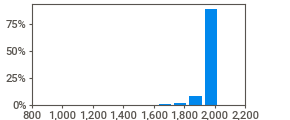
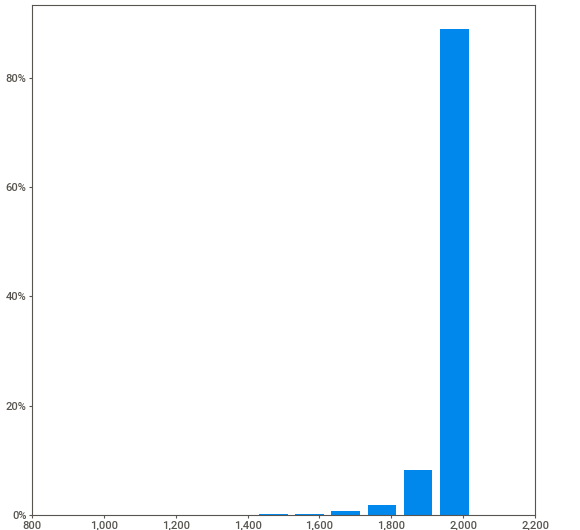
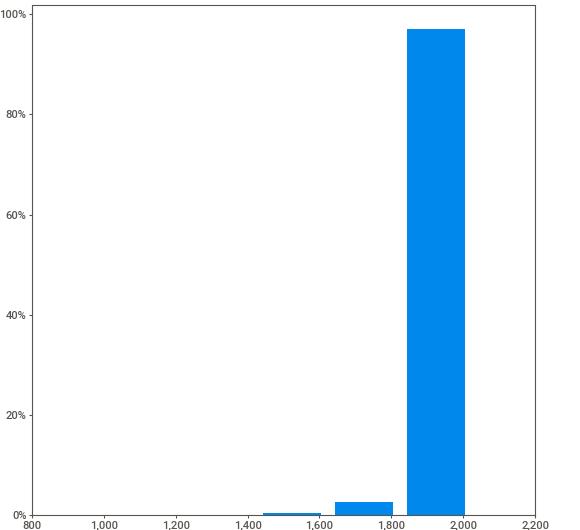
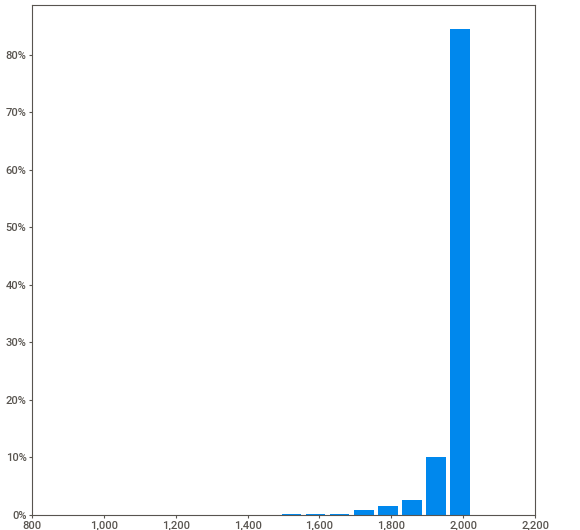
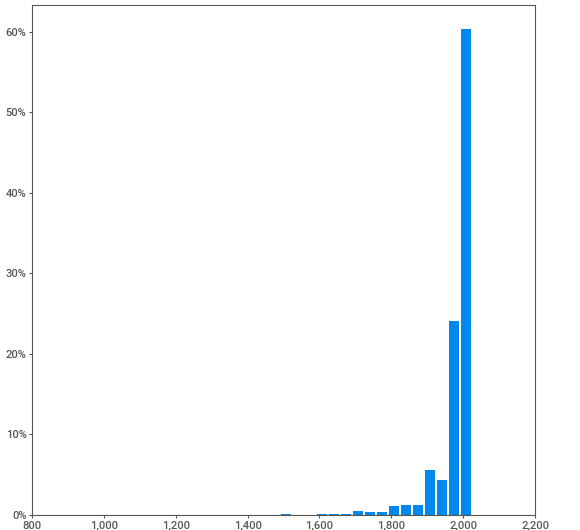
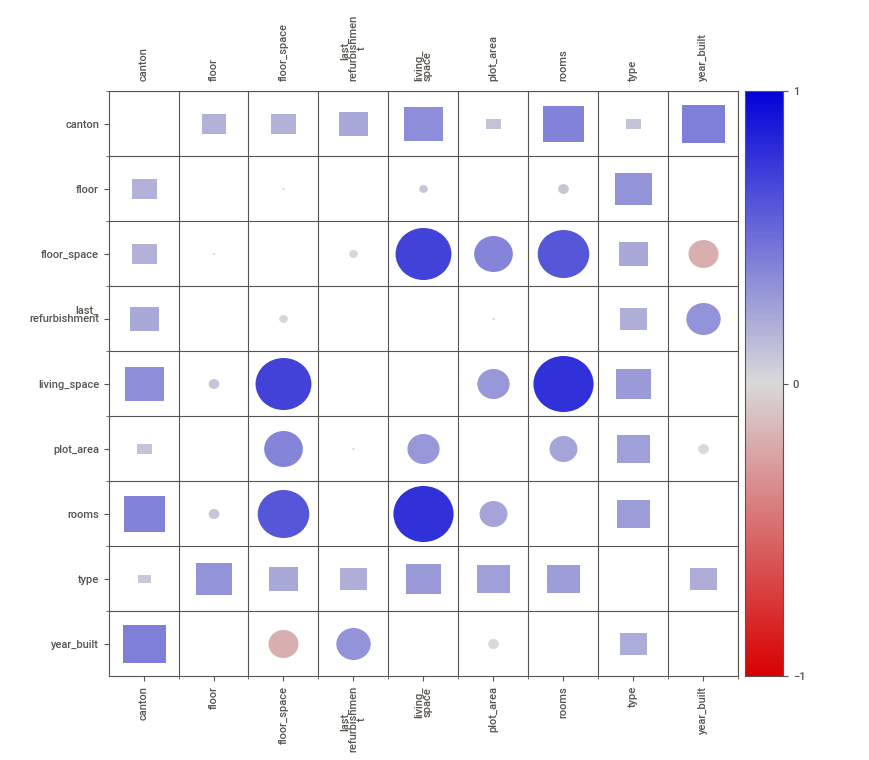
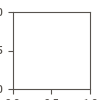

In [6]:
# reorder columns alphabetically and show sweetviz report
df = df.reindex(sorted(df.columns), axis=1)
sweet_report = sv.analyze(df)
sweet_report.show_notebook()

In [7]:
df.to_parquet('../../data/kaggle_cleaned.parquet')

In [8]:
df = helper.process_data(return_gde=True, kaggle=True)

In [9]:
df = clean_rows(df)
df.to_parquet('../../data/kaggle_gde_cleaned.parquet')